Projet de Machine Learning

Importation des bibliotheques

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Importation du fichier première visualisation

In [48]:
data = pd.read_csv("Dataset_Projet.csv", sep=";")
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Preprocessing des données

In [49]:
# Vérifiions les valeurs manquantes (NaN)
print("Valeurs manquantes (NaN) par colonne :")
print(data.isnull().sum(), "\n")

# Vérifions les valeurs vides
print("Valeurs vides ('') par colonne :")
print(data.applymap(lambda x: str(x).strip() == '').sum(), "\n")

#Encodons les variables qualitatives en variables quantitatives
encoder = LabelEncoder()
qualitative_cols = data.select_dtypes(include=["object", "category"]).columns
for col in qualitative_cols:
    data[col] = encoder.fit_transform(data[col].astype(str))

print(data.head())

Valeurs manquantes (NaN) par colonne :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

Valeurs vides ('') par colonne :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


/tmp/ipython-input-631444688.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(data.applymap(lambda x: str(x).strip() == '').sum(), "\n")


Split des données

In [50]:
# Séparation des features (X) et de la cible (y)
X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Aperçu rapide des données
print("\nAperçu du jeu d'entraînement :")
print(X_train.head())


Aperçu du jeu d'entraînement :
      age  sex    bmi  children  smoker  region
560    46    0  19.95         2       0       1
1285   47    0  24.32         0       0       0
1142   52    0  24.86         0       0       2
969    39    0  34.32         5       0       2
486    54    0  21.47         3       0       1


Scaling des données

In [51]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


Préparations du modèle de régression linéaire

In [52]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Prediction des couts en fonction de différents modèles

In [53]:
y_pred = model.predict(X_test_scaled)

Test des différentes métriques liées a ce modèle pour tester son efficacité


=== Évaluation du modèle de régression ===
MAE  (Mean Absolute Error)      : 4186.509
RMSE (Root Mean Squared Error)  : 33635210.431
R²   (Coefficient de détermination) : 0.783


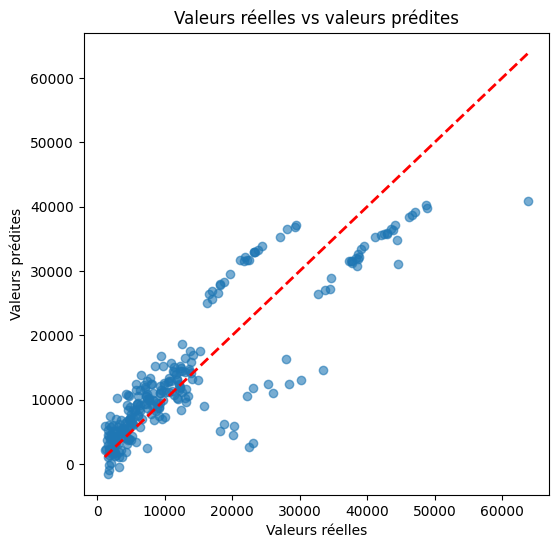

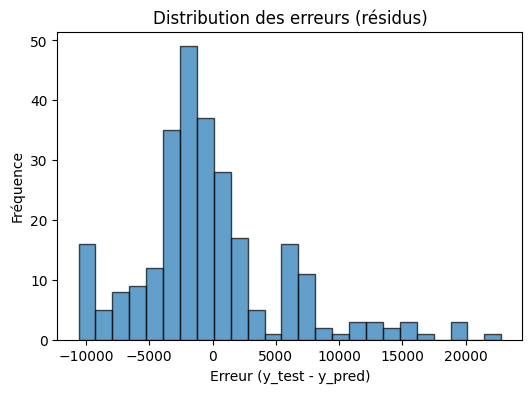

In [54]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, )
r2 = r2_score(y_test, y_pred)

print("\n=== Évaluation du modèle de régression ===")
print(f"MAE  (Mean Absolute Error)      : {mae:.3f}")
print(f"RMSE (Root Mean Squared Error)  : {rmse:.3f}")
print(f"R²   (Coefficient de détermination) : {r2:.3f}")

# === Visualisation : Valeurs réelles vs prédites ===
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Valeurs réelles vs valeurs prédites")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.show()

# === Visualisation : Distribution des erreurs ===
errors = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.hist(errors, bins=25, edgecolor="k", alpha=0.7)
plt.title("Distribution des erreurs (résidus)")
plt.xlabel("Erreur (y_test - y_pred)")
plt.ylabel("Fréquence")
plt.show()